<p style="font-family: 'Amiri', serif; font-size: 3rem; color: grey; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: whte; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: black; animation: pulse 2s infinite;">Predict </span>
  <span style="font-weight: bold; color: black; animation: pulse 2s infinite;"> Student Performance  </span> 
</p>



<table border="1" cellpadding="8">
    <tr>
        <th style="font-size: 18px;"><strong>Dataset Information</strong></th>
    </tr>
    <tr>
        <td style="font-size: 16px;">
            <strong>Purpose of use of the dataset</strong><br>
            The dataset use in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place.
        </td>
    </tr>
    <tr>
        <td style="font-size: 16px;">
            <strong>The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors.</strong>
        </td>
    </tr>
    <tr>
        <td style="font-size: 16px;">
            <strong>The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course.</strong>
        </td>
    </tr>
    <tr>
        <td style="font-size: 16px;">
            <strong>Who funded the creation of the dataset?</strong><br>
            This dataset is supported by program SATDAP, Portugal.
        </td>
    </tr>
    <tr>
        <td style="font-size: 16px;">
            <strong>What do the instances in this dataset represent?</strong><br>
            Each instance is a student.
        </td>
    </tr>
    <tr>
        <td style="font-size: 16px;">
            <strong>Are there recommended data splits?</strong><br>
            The dataset was used, in our project, with a data split of 80% for training and 20% for test.
        </td>
    </tr>
    <tr>
        <td style="font-size: 16px;">
            <strong>Was there any data preprocessing performed?</strong><br>
            We performed a rigorous data preprocessing to handle data from anomalies, unexplainable outliers, and missing values.
        </td>
    </tr>
    <tr>
        <td style="font-size: 16px;">
            <strong>Has Missing Values?</strong><br>
            No
        </td>
    </tr>
</table>



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'> Evalaution Metric :</font></h3>
    
    
    

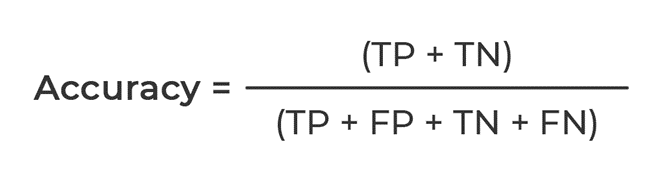




<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

In [5]:
!pip install -U lightgbm



In [6]:
import pandas as pd
import lightgbm as lgb
print(lgb.__version__)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import auc
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from scipy.stats import mode


4.5.0


C:\Users\shibl\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [7]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: darkgoldenrod; animation: pulse 2s infinite;">Check </span>
  <span style="font-weight: bold; color:darkgoldenrod; animation: pulse 2s infinite;"> Data  </span> 
</p>

In [9]:
df_train.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [10]:
df_train.describe()

id  Marital status  Application mode  Application order  \
count  76518.000000    76518.000000      76518.000000       76518.000000   
mean   38258.500000        1.111934         16.054419           1.644410   
std    22088.988286        0.441669         16.682337           1.229645   
min        0.000000        1.000000          1.000000           0.000000   
25%    19129.250000        1.000000          1.000000           1.000000   
50%    38258.500000        1.000000         17.000000           1.000000   
75%    57387.750000        1.000000         39.000000           2.000000   
max    76517.000000        6.000000         53.000000           9.000000   

             Course  Daytime/evening attendance  Previous qualification  \
count  76518.000000                76518.000000            76518.000000   
mean    9001.286377                    0.915314                3.658760   
std     1803.438531                    0.278416                8.623774   
min       33.000000                    0.000000                1.000000   
25%     9119.000000                    1.000000                1.000000   
50%     9254.000000                    1.000000                1.000000   
75%     9670.000000                    1.000000                1.000000   
max     9991.000000                    1.000000               43.000000   

       Previous qualification (grade)   Nacionality  Mother's qualification  \
count                    76518.000000  76518.000000            76518.000000   
mean                       132.378766      1.226600               19.837633   
std                         10.995328      3.392183               15.399456   
min                         95.000000      1.000000                1.000000   
25%                        125.000000      1.000000                1.000000   
50%                        133.100000      1.000000               19.000000   
75%                        140.000000      1.000000               37.000000   
max                        190.000000    109.000000               44.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     76518.00000   
mean   ...                                         0.05796   
std    ...                                         0.40849   
min    ...                                         0.00000   
25%    ...                                         0.00000   
50%    ...                                         0.00000   
75%    ...                                         0.00000   
max    ...                                        12.00000   

       Curricular units 2nd sem (credited)  \
count                         76518.000000   
mean                              0.137053   
std                               0.933830   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                         76518.000000   
mean                              5.933414   
std                               1.627182   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                            76518.000000   
mean                                 7.234468   
std                                  3.503040   
min                                  0.000000   
25%                                  6.000000   
50%                                  7.000000   
75%                                  9.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                         765


<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Data Description</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #F5F5DC;
            margin: 20px;
        }
        .container {
            border-radius: 10px;
            border: #DEB887 solid 2px;
            padding: 15px;
            background-color: skyblue;
        }
        h3 {
            text-align: center;
            color: #6B4226;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 10px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }
        th {
            background-color: #4682B4; /* Blue color */
            color: black;
        }
    </style>
</head>
<body>
    <div class="container">
        <h3>What Does Data Describe</h3>
        <table>
            <tr>
                <th>Feature</th>
                <th>Description</th>
            </tr>
            <tr>
                <td>Marital status</td>
                <td>Mostly single (mean ≈ 1), with values ranging from 1 to 6.</td>
            </tr>
            <tr>
                <td>Application mode</td>
                <td>Wide variety, with an average mode of 16, and some modes reaching up to 53.</td>
            </tr>
            <tr>
                <td>Application order</td>
                <td>Primarily lower application orders (mean ≈ 1.64), but can go up to 9.</td>
            </tr>
            <tr>
                <td>Course</td>
                <td>Course codes are generally around 9000, ranging from 33 to 9991.</td>
            </tr>
            <tr>
                <td>Previous qualification</td>
                <td>Varies widely (mean ≈ 3.66), with a significant number of different qualifications (up to 43).</td>
            </tr>
            <tr>
                <td>Previous qualification (grade)</td>
                <td>Average grade around 132, with grades ranging from 95 to 190.</td>
            </tr>
            <tr>
                <td>Nationality</td>
                <td>Mostly local students (mean ≈ 1.23), but includes a few international students (up to 109 different nationalities).</td>
            </tr>
            <tr>
                <td>Mother's qualification</td>
                <td>Varies broadly, with many mothers having up to a high school level qualification (mean ≈ 19.84, max 44).</td>
            </tr>
            <tr>
                <td>Admission grade</td>
                <td>Average around 132, with grades ranging from 95 to 190, indicating a generally high level of academic performance.</td>
            </tr>
            <tr>
                <td>Curricular units 2nd sem (approved)</td>
                <td>Students typically pass about 4 units in the second semester, with a wide range (0 to 20 units).</td>
            </tr>
        </table>
    </div>
</body>
</html>


In [12]:
df_test.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 37 columns]

In [13]:
df_sub.head()

id    Target
0  76518  Graduate
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Graduate

In [14]:
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: white; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: darkgoldenrod; animation: pulse 2s infinite;">Exploratory</span>
  <span style="font-weight:bold; color: darkgoldenrod; animation: pulse 2s infinite;"> Data Analysis(EDA)  </span> 
</p>

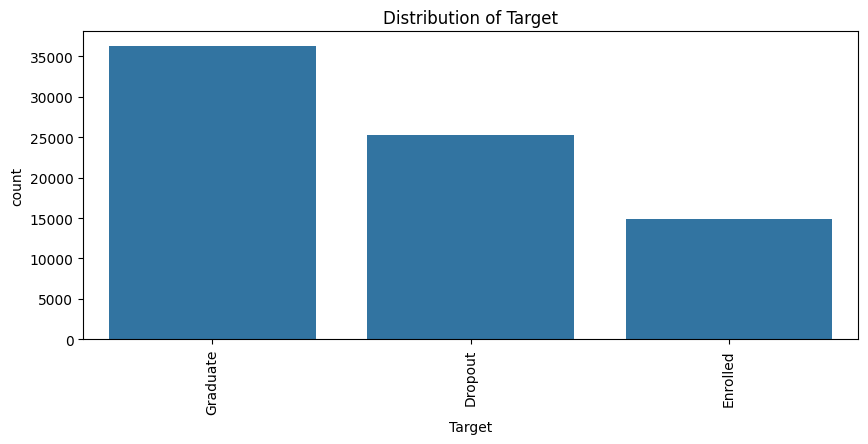

In [16]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df_train)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

Aspect	Description	Implications
Class Imbalance	<div style="background-color: #D6EAF8; padding: 10px;">The data shows a class imbalance with more graduates compared to dropouts and enrolled students. This imbalance should be considered when building predictive models, as it may bias the model towards predicting the majority class (graduates).</div>	
Techniques to Address	<div style="background-color: #D6EAF8; padding: 10px;">- Resampling: Oversampling the minority classes or undersampling the majority class. <br> - Adjusting Class Weights: Modifying the weights assigned to each class in the model to give more importance to the minority classes. <br> - Specialized Algorithms: Using algorithms designed to handle imbalanced data, such as SMOTE or ADASYN.</div>	
Analysis Focus	<div style="background-color: #D6EAF8; padding: 10px;">Graduates</div>	<div style="background-color:#D6EAF8; padding: 10px;">Understanding the factors that contribute to graduation can help in identifying successful strategies and practices that can be reinforced.</div>
Implications		
Dropouts	<div style="background-color: #D6EAF8; padding: 10px;"></div>	<div style="background-color: #D6EAF8; padding: 10px;">Analyzing the dropout segment can provide insights into why students are leaving and what interventions might reduce dropout rates.</div>
Enrolled	<div style="background-color: #D6EAF8; padding: 10px;"></div>	<div style="background-color: #D6EAF8; padding: 10px;">Monitoring this group can help in making real-time interventions to support students currently in the system.</div>

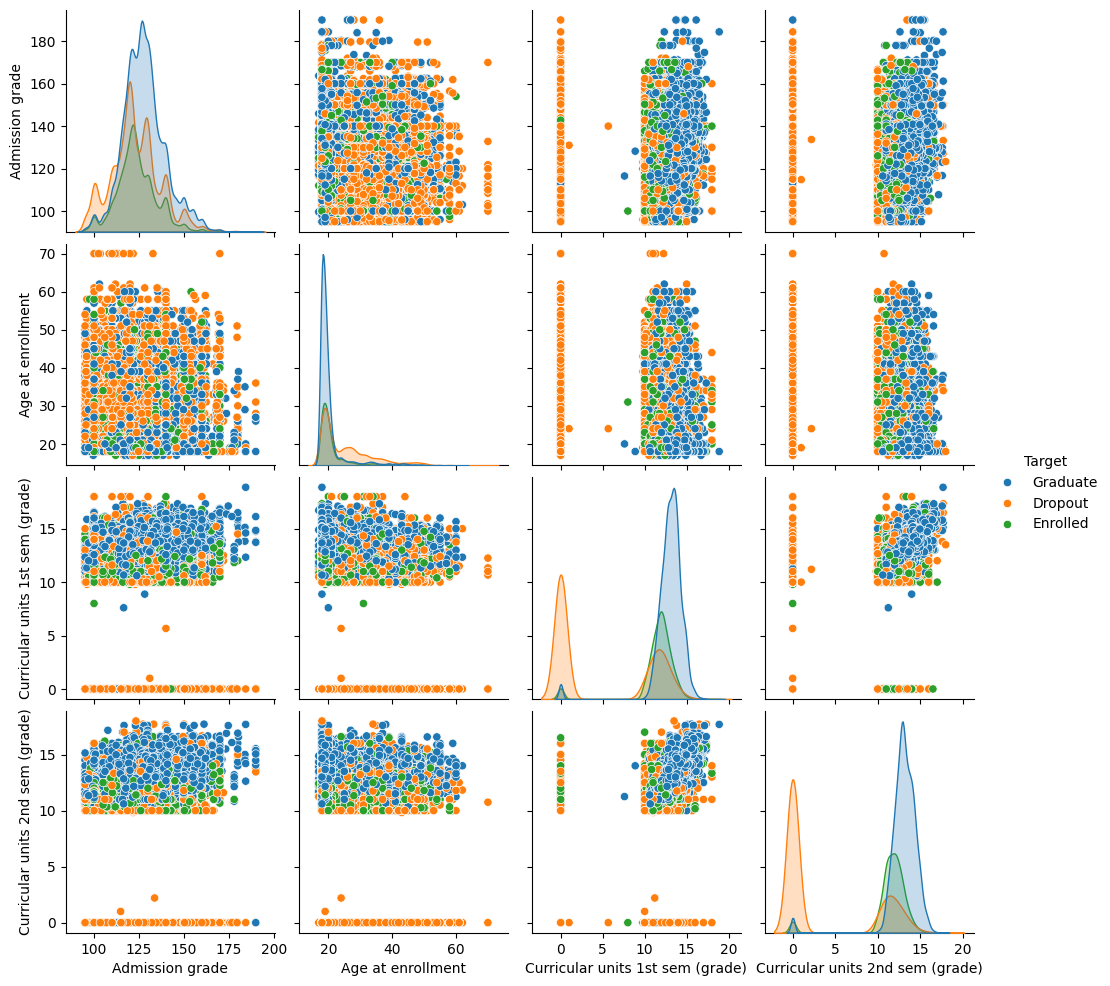

In [18]:
selected_features = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']
sns.pairplot(df_train[selected_features], hue='Target')
plt.show()

<table border="1" cellpadding="8">
  <tr>
    <th>Outcome</th>
    <th>Observation</th>
  </tr>
  <tr>
    <td>Graduates</td>
    <td>Points with high admission grades tend to also have higher grades in the first semester, indicating a positive correlation between admission grades and first semester performance.</td>
  </tr>
  <tr>
    <td>Dropouts</td>
    <td>Points tend to cluster at lower grades in the first semester or have zero grades, which may indicate difficulties in the curriculum or other factors leading to dropout.</td>
  </tr>
  <tr>
    <td>Enrolled</td>
    <td>These points are spread out but tend to be in the mid-range of grades, indicating that these students are still progressing but may not have exceptionally high grades.</td>
  </tr>
</table>


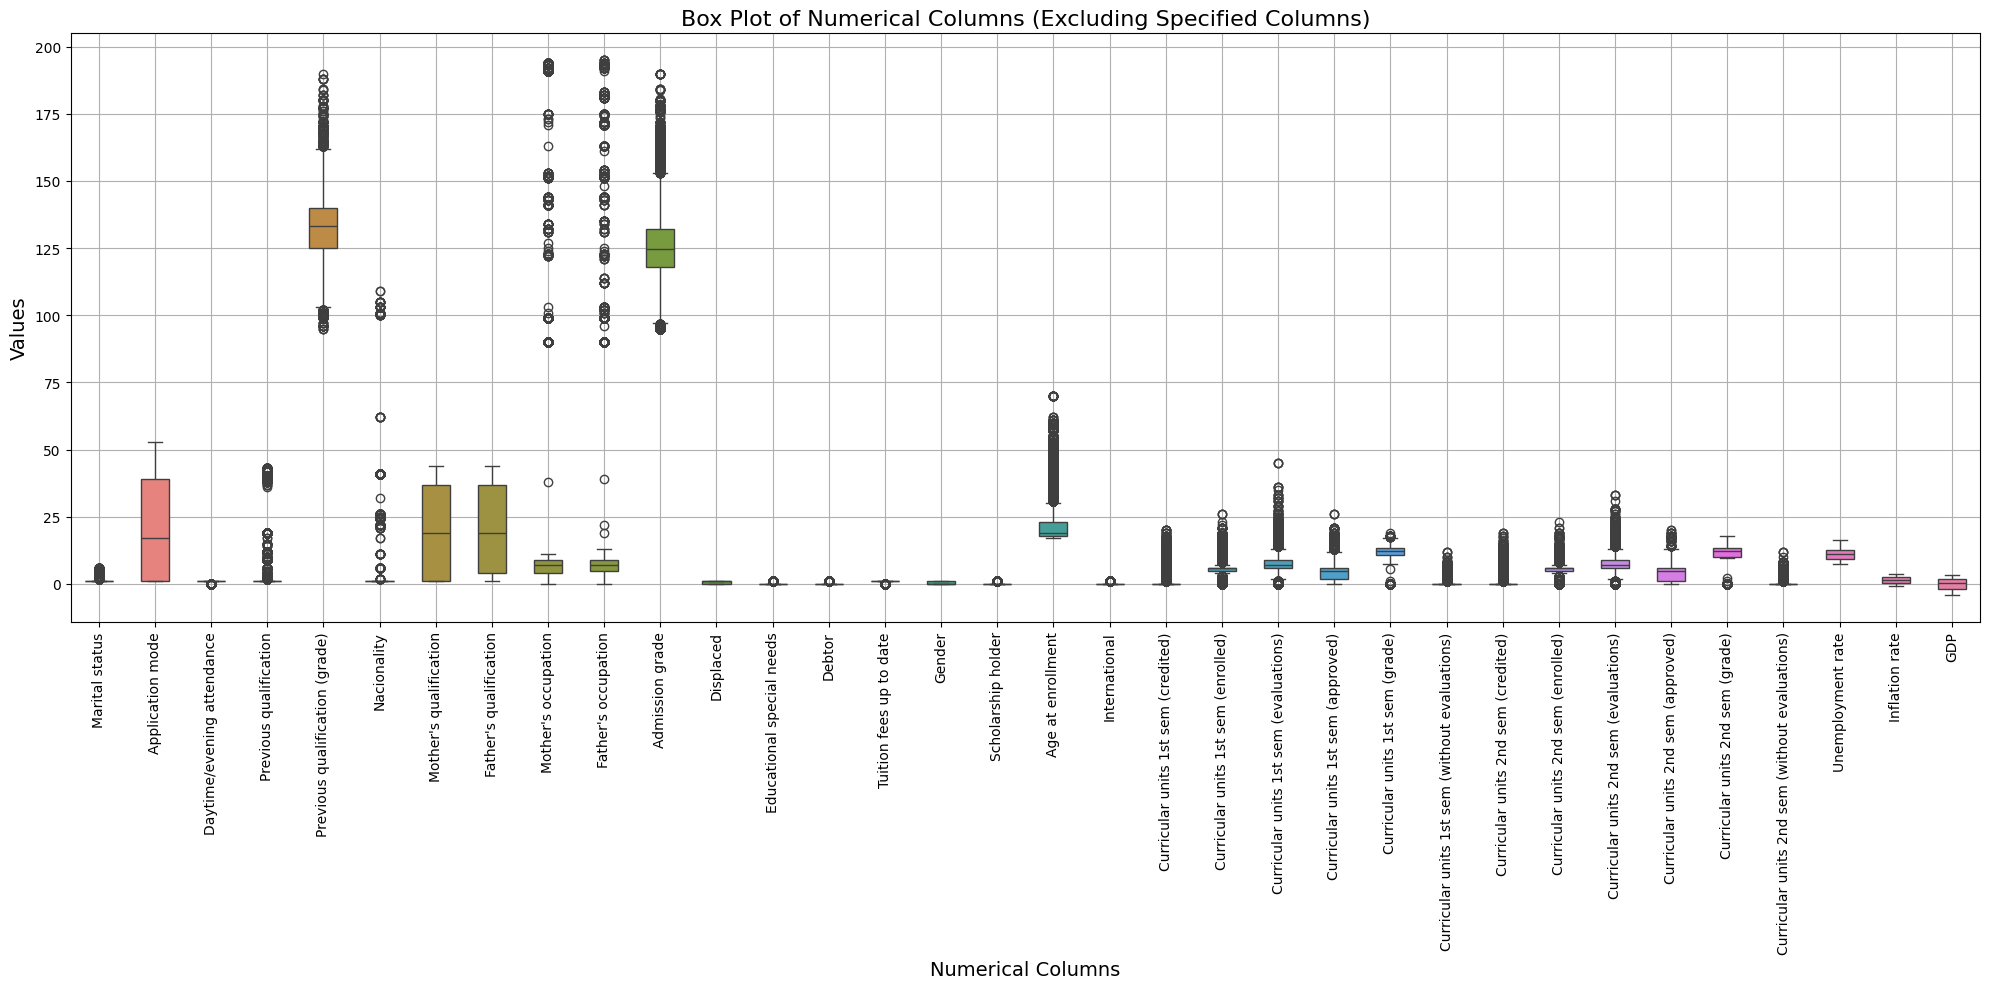

In [20]:
exclude_columns = ['id', 'Application order', 'Course']
numerical_cols = df_train.select_dtypes(include=['number']).drop(columns=exclude_columns).columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_train[numerical_cols], orient='v', width=0.5)
plt.title('Box Plot of Numerical Columns (Excluding Specified Columns)', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

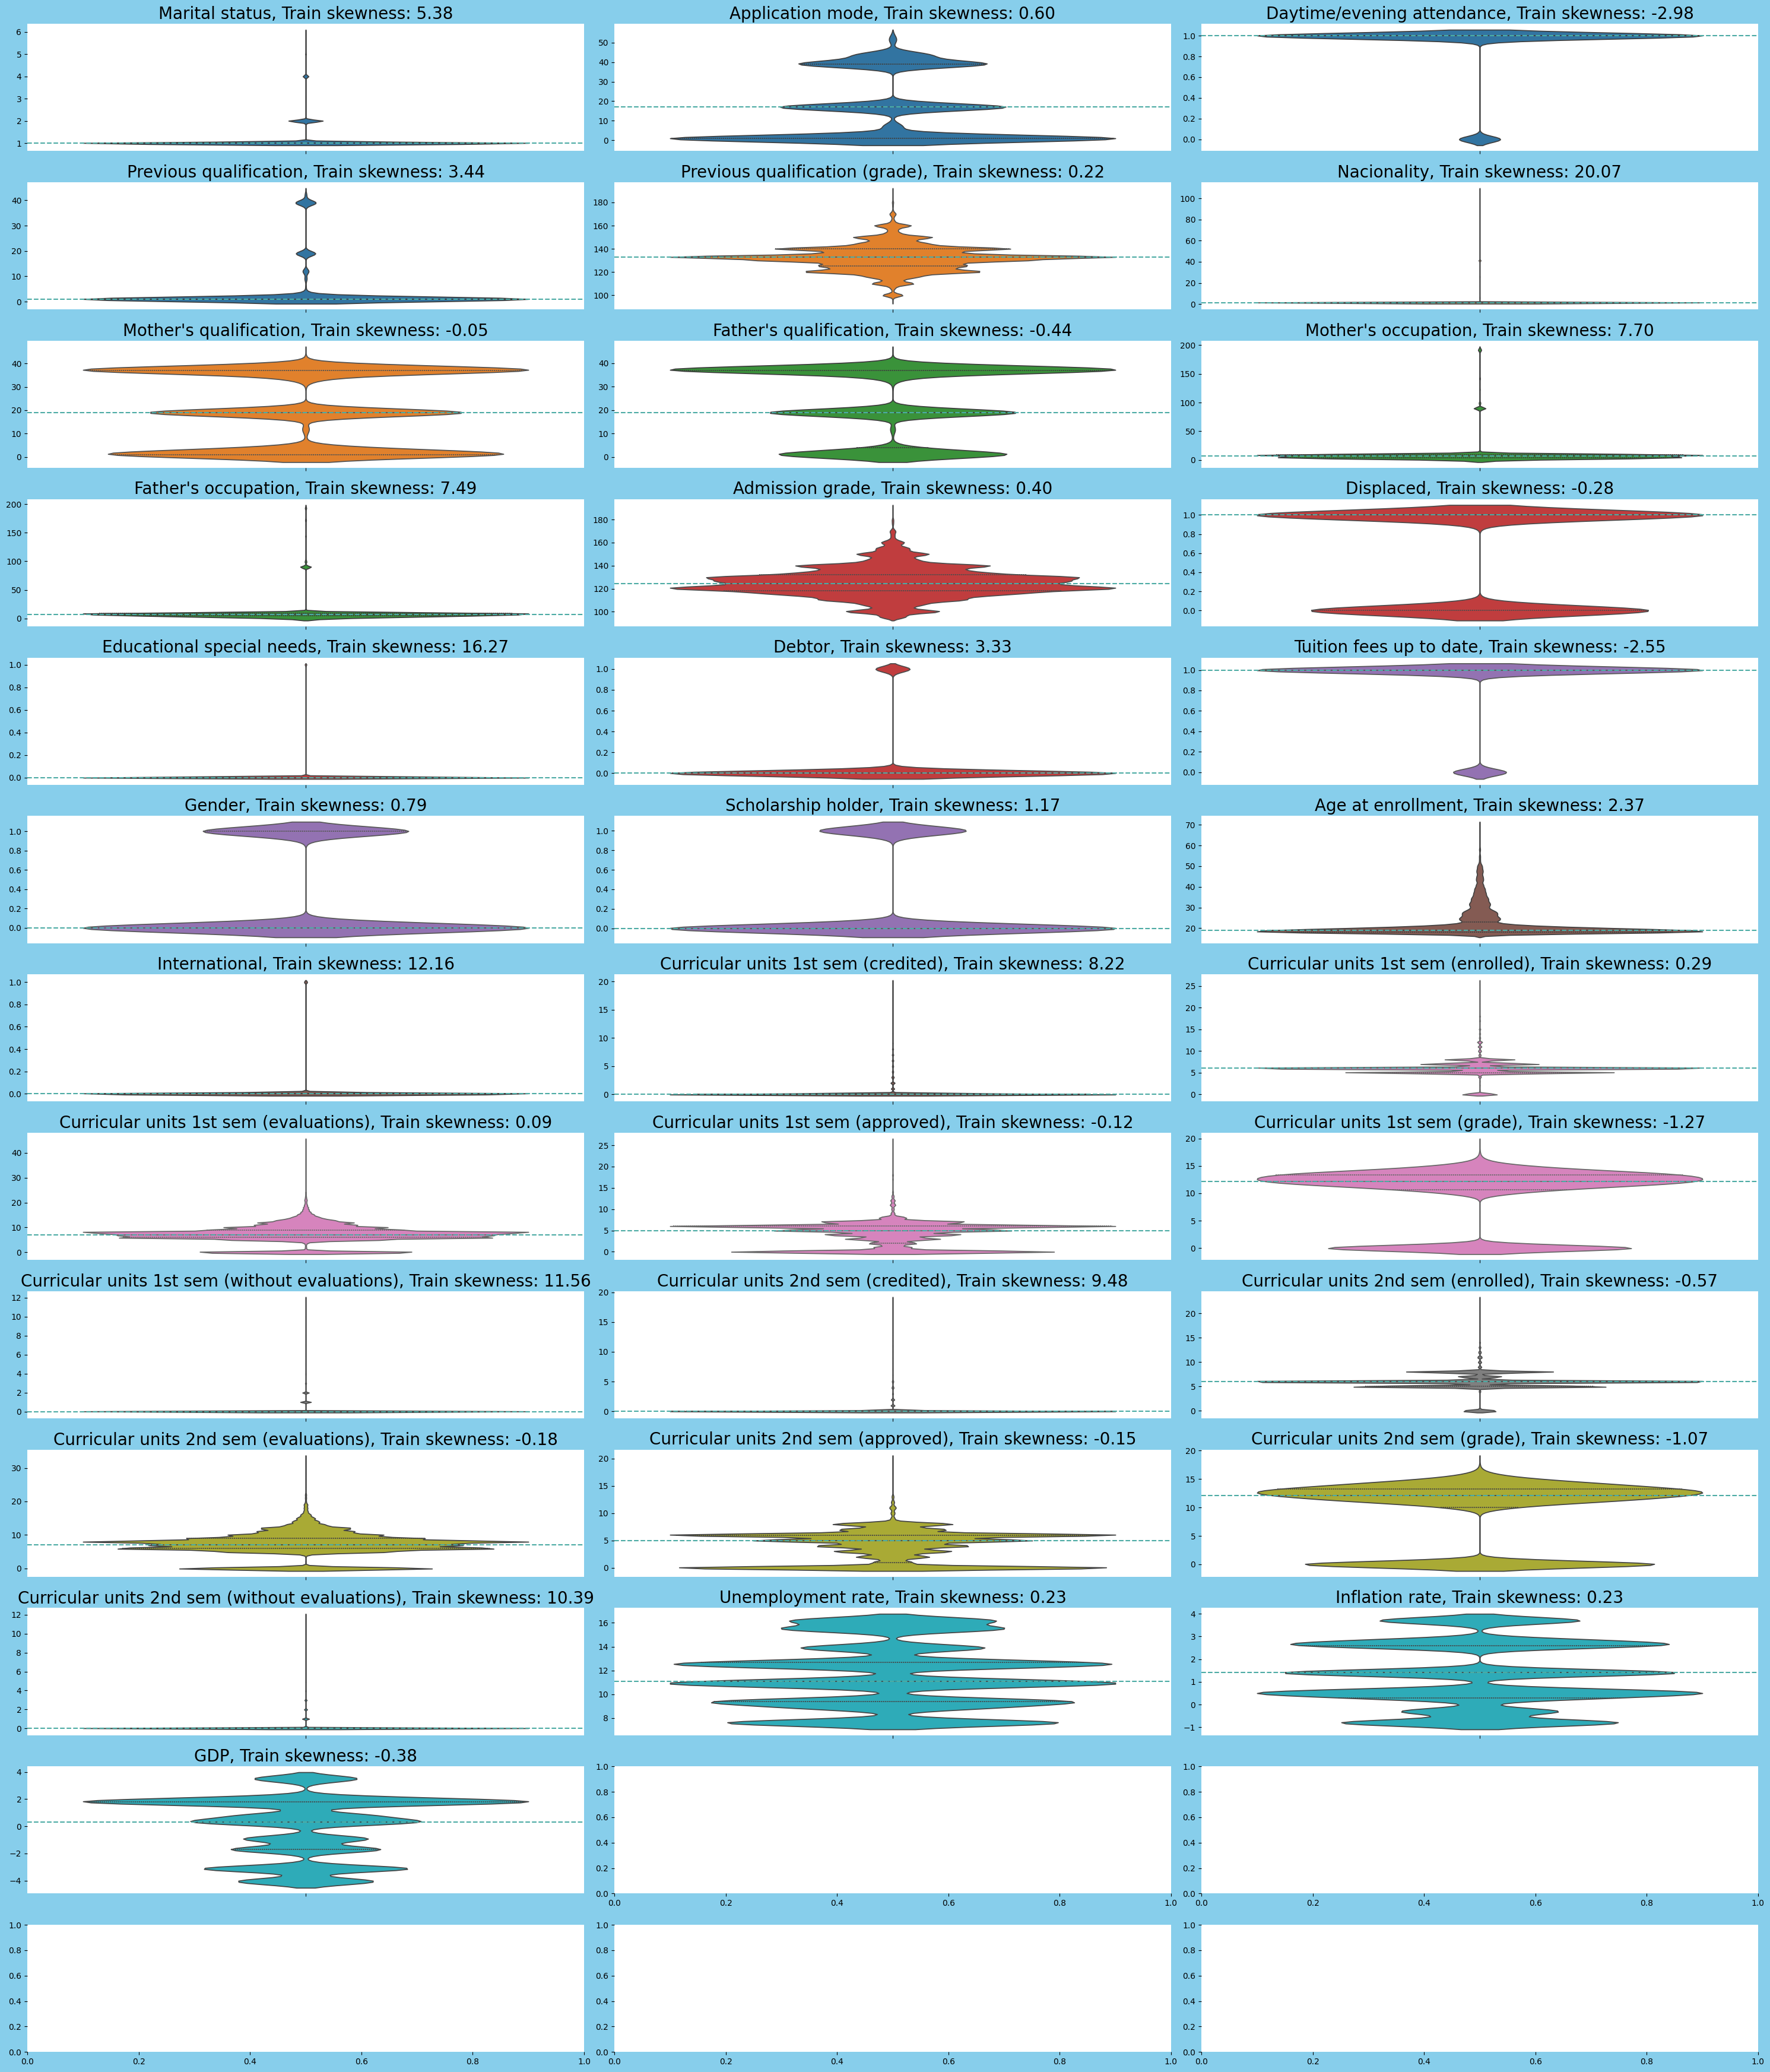

In [21]:
def violin_plot(train_dataset, columns_list, rows, cols):
    import matplotlib.cm as cm
    from itertools import cycle

    columns_list = [col for col in columns_list if col != 'id'] 
    fig, axs = plt.subplots(rows, cols, figsize=(30, 35))
    fig.subplots_adjust(hspace=2, top=0.4)  
    
    colors = cycle(cm.tab10(np.linspace(0, 1, len(columns_list))))  

    for i, col in enumerate(columns_list):
        color = next(colors) 
        sns.violinplot(y=train_dataset[col], ax=axs[i // cols, i % cols], color=color, inner='quartile')
        axs[i // cols, i % cols].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}', fontsize=20)
        axs[i // cols, i % cols].set_xlabel('')
        axs[i // cols, i % cols].set_ylabel('')
        axs[i // cols, i % cols].tick_params(axis='both', which='major', labelsize=10)
        median_train = train_dataset[col].median()
        axs[i // cols, i % cols].axhline(y=median_train, color='#4caba4', linestyle='--')
        
    #fig.suptitle('Violin Plot of Numeric Columns', fontsize=36)
    plt.tight_layout()
    plt.gcf().set_facecolor('skyblue')
    sns.despine(left=True, bottom=True)

violin_plot(train_dataset=df_train, columns_list=numerical_cols, rows=13, cols=3)


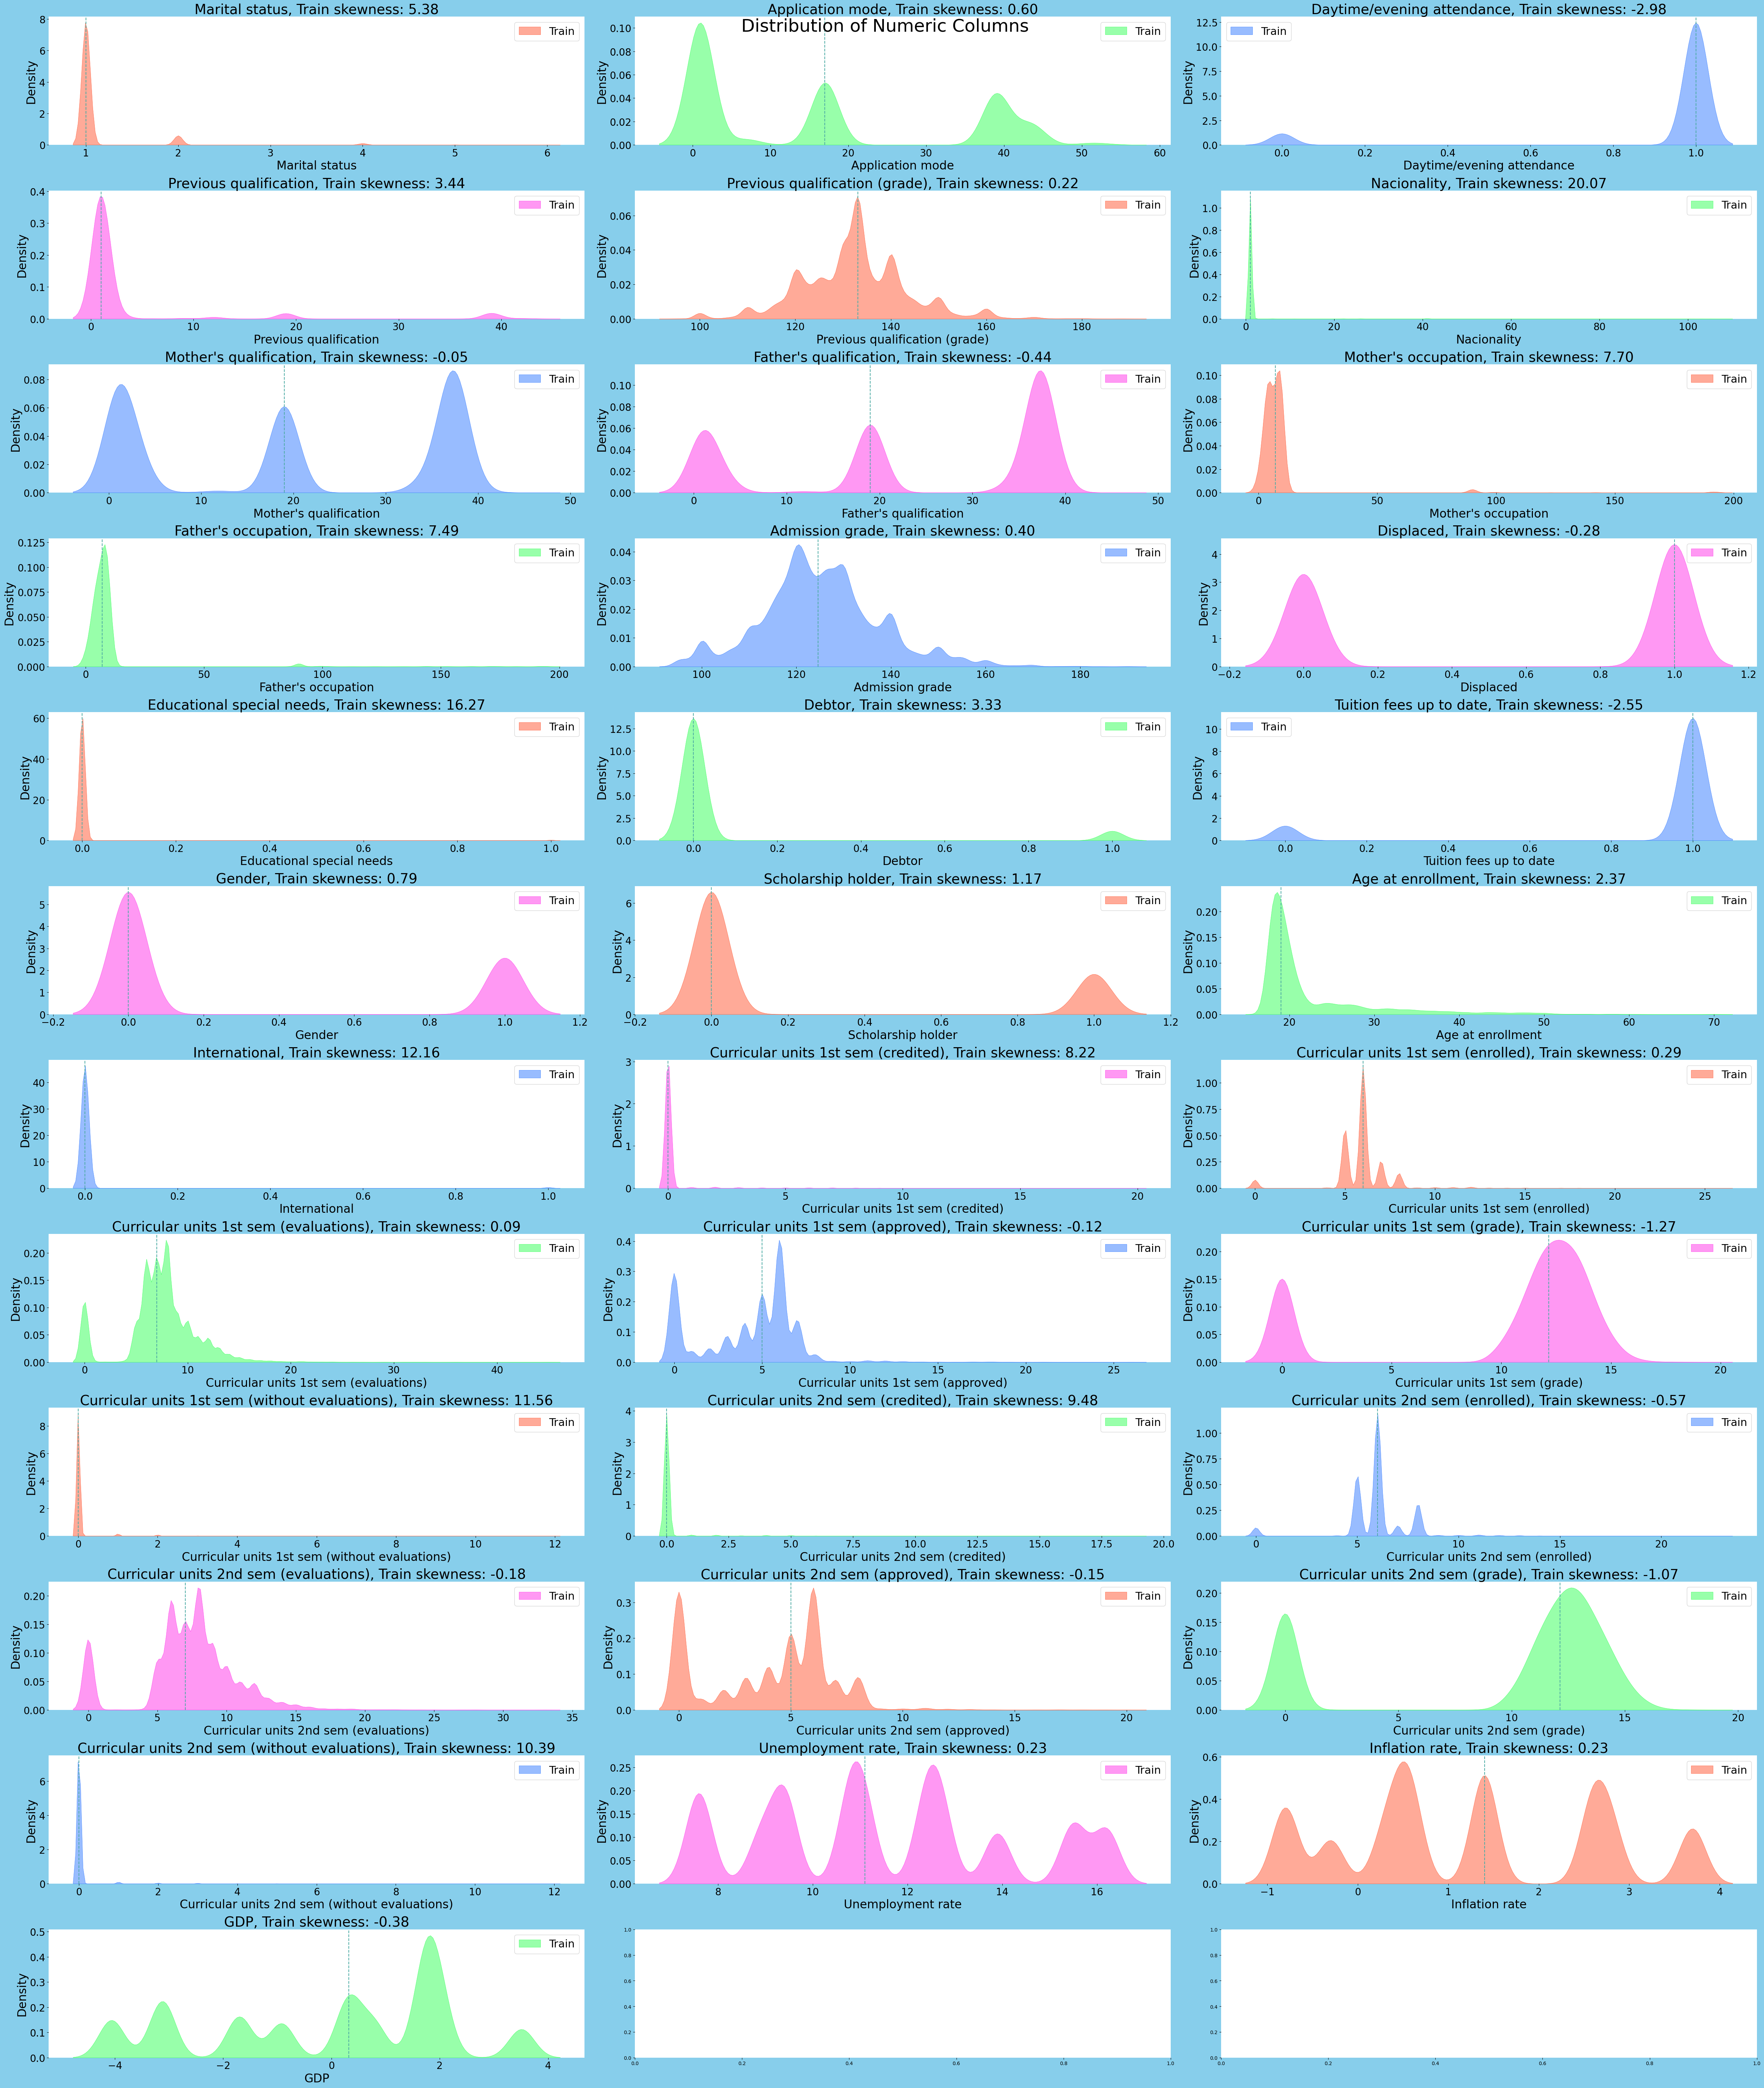

In [22]:
def dist(train_dataset, columns_list, rows, cols):
    columns_list = [col for col in columns_list if col != 'id'] 
    fig, axs = plt.subplots(rows, cols, figsize=(50, 60))  
    fig.subplots_adjust(hspace=1, wspace=1)  

    colors = ['#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9', '#FF5733', '#33FF57', '#337AFF', '#FF33E9']
    
    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i // cols, i % cols], fill=True, alpha=0.5, linewidth=0.5, color=colors[i], label='Train')
        axs[i // cols, i % cols].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}', fontsize=28) 
        axs[i // cols, i % cols].set_xlabel(col, fontsize=24)  
        axs[i // cols, i % cols].set_ylabel('Density', fontsize=24) 
        axs[i // cols, i % cols].legend(fontsize=22)  
        axs[i // cols, i % cols].tick_params(axis='both', which='major', labelsize=20)  
        median_train = train_dataset[col].median()
        axs[i // cols, i % cols].axvline(x=median_train, color='#4caba4', linestyle='--')
        
    fig.suptitle('Distribution of Numeric Columns', fontsize=36)  
    plt.tight_layout()
    plt.gcf().set_facecolor('skyblue')
    sns.despine(left=True, bottom=True) 

dist(train_dataset=df_train, columns_list=numerical_cols, rows=12, cols=3)




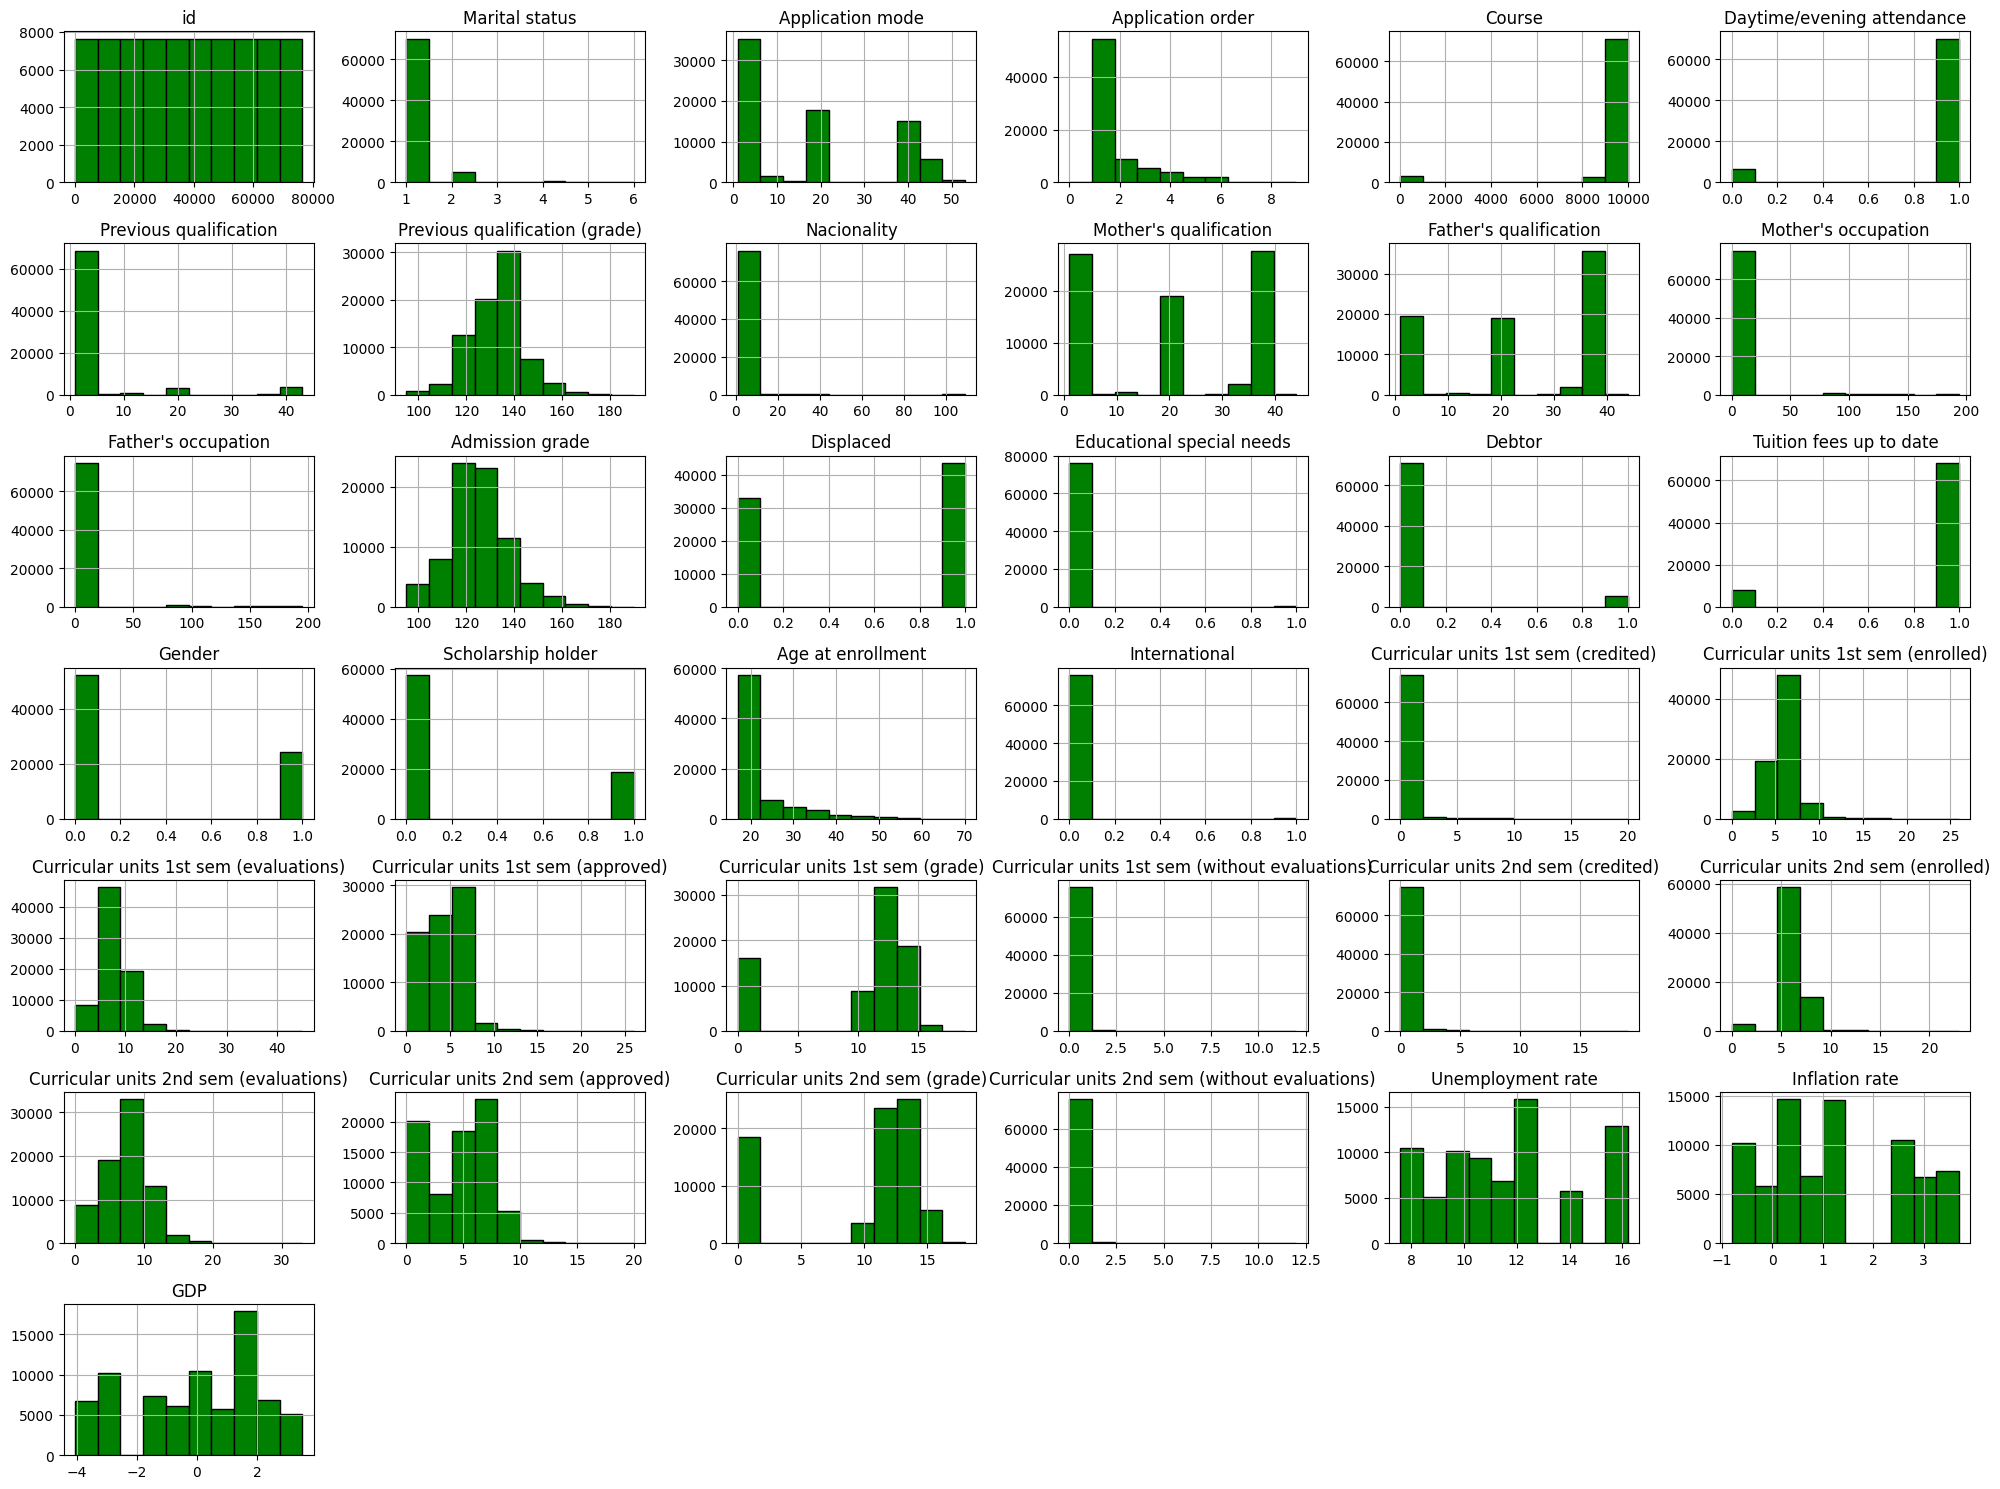

In [23]:
df_train.hist(figsize=(20, 15), color='green', edgecolor='black')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

In [24]:
label_encoder = LabelEncoder()
df_train['Target'] = label_encoder.fit_transform(df_train['Target'])

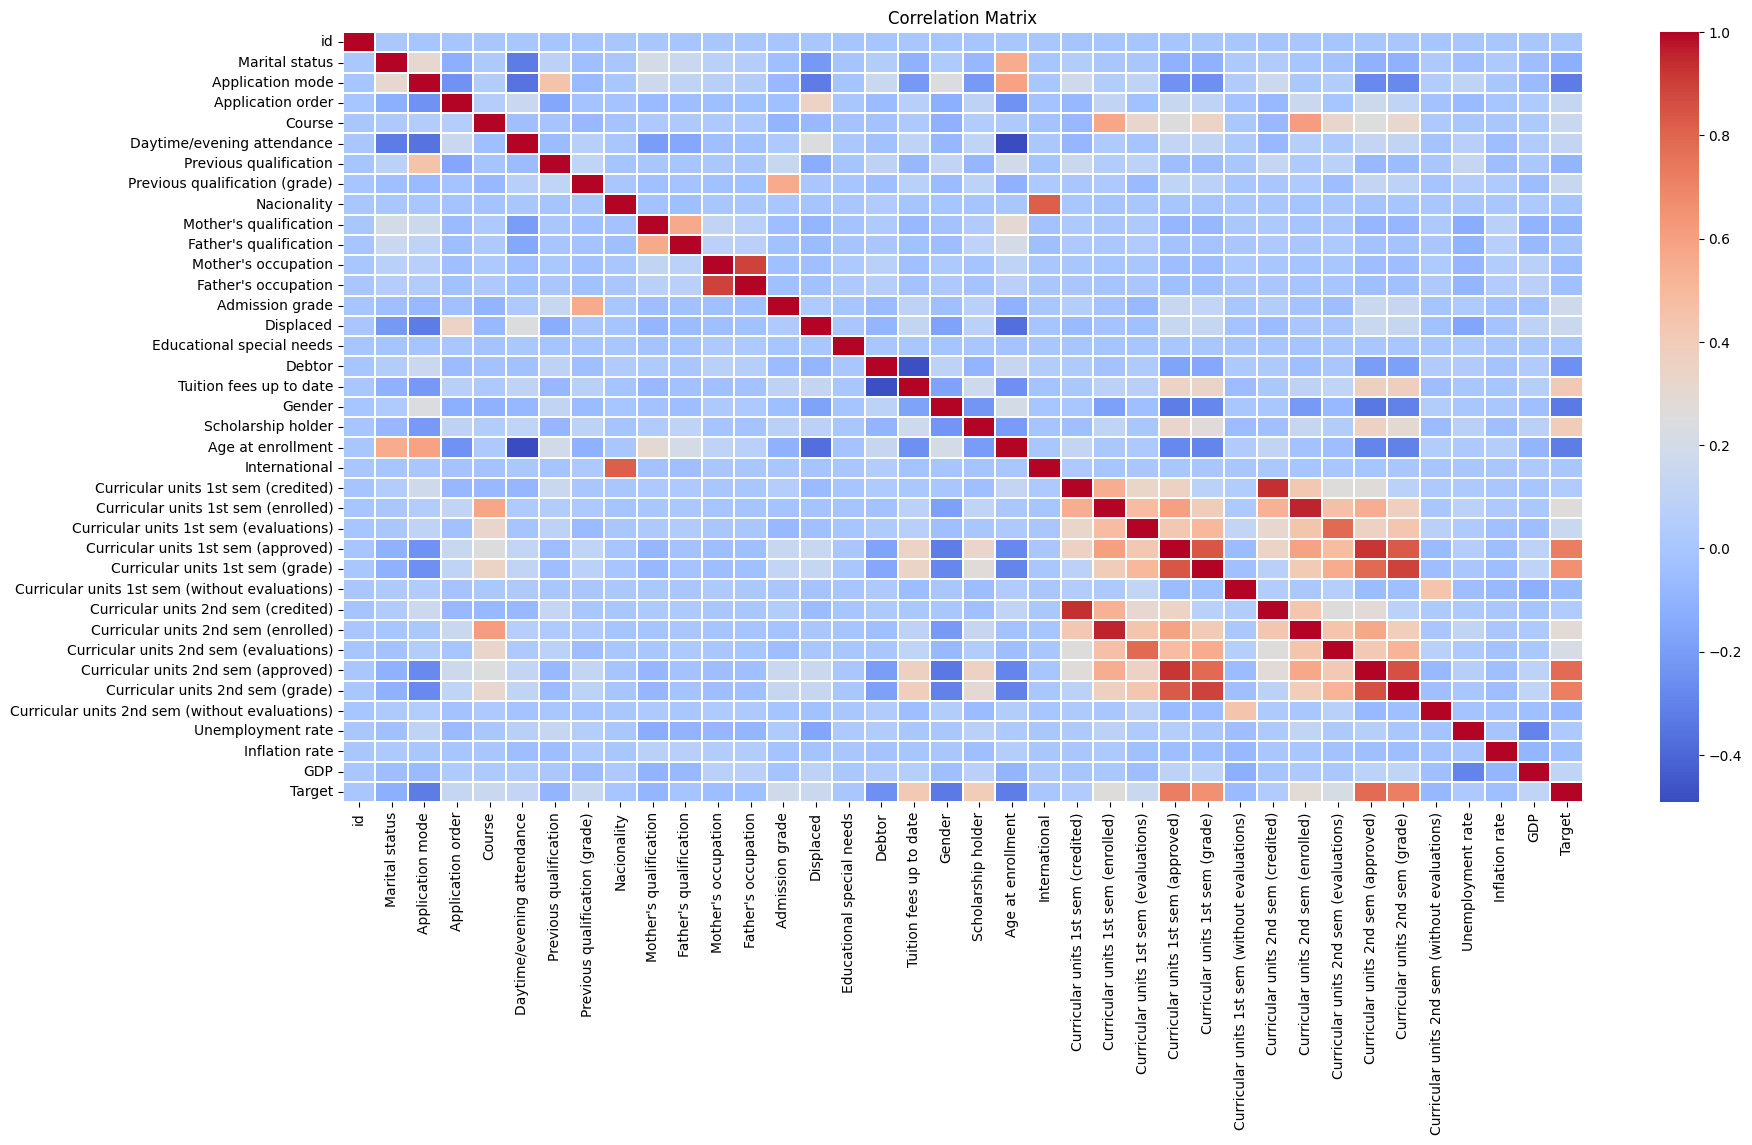

In [25]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=0.1)
#plt.gcf().set_facecolor('skyblue')  
plt.title('Correlation Matrix')
plt.show()

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: white; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: darkgoldenrod; animation: pulse 2s infinite;">What Does Plot </span>
  <span style="font-weight: bold; color: darkgoldenrod; animation: pulse 2s infinite;"> Convey  </span> 
</p>

<table border="1" cellpadding="5">
    <tr>
        <th style="font-size: 20px;"><strong>Issue</strong></th>
        <th style="font-size: 20px;"><strong>Action</strong></th>
    </tr>
    <tr>
        <td>
            <strong>Academic Performance:</strong><br>
            Higher grades strongly correlate with graduation, indicating a key predictor of success.
        </td>
        <td>
            - No action required.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Age at Enrollment:</strong><br>
            Younger enrollment age correlates with higher graduation rates.
        </td>
        <td>
            - No action required.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Macroeconomic Factors:</strong><br>
            While factors like unemployment rate, inflation rate, and GDP show weak correlations, they still offer insights into students' academic experiences within broader economic contexts.
        </td>
        <td>
            - No action required.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Gender and Scholarships:</strong><br>
            Gender shows a weak positive correlation, while scholarships have a negative correlation, suggesting areas for targeted support.
        </td>
        <td>
            - No action required.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Family Background:</strong><br>
            While parents' qualifications don't directly correlate with student success, they still influence outcomes, highlighting the importance of familial support.
        </td>
        <td>
            - No action required.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Marital Status:</strong><br>
            Specific marital statuses and age may impact academic success, suggesting the need for tailored support for different demographic groups.
        </td>
        <td>
            - No action required.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Marital Status and Previous Qualification:</strong><br>
            Remove outliers beyond valid ranges (6329 outliers in Marital status and 9335 in Previous qualification) to ensure better accuracy.
        </td>
        <td>
            - Remove outliers.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Application Order and Course:</strong><br>
            Address outliers around 7895 in Application order and 5371 in Course to maintain data integrity.
        </td>
        <td>
            - Address outliers.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Age at Enrollment:</strong><br>
            Remove outliers (8935 entries) outside the expected age range for students.
        </td>
        <td>
            - Remove outliers.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Curricular Units (1st and 2nd Semesters):</strong><br>
            Analyze outliers in columns such as evaluations, enrolled, and approved to ensure consistency.
        </td>
        <td>
            - Analyze outliers.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Curricular Units Grades:</strong><br>
            Address outliers to ensure accurate data representation.
        </td>
        <td>
            - Address outliers.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Correlated Columns:</strong><br>
            Consider dropping one of each pair to avoid multicollinearity.
        </td>
        <td>
            - Drop correlated columns.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Previous Qualification Grade:</strong><br>
            Remove outliers (1364) beyond expected grade ranges for better data quality.
        </td>
        <td>
            - Remove outliers.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Occupation Columns:</strong><br>
            Remove significant outliers in "Mother's occupation" and "Father's occupation" to ensure data validity.
        </td>
        <td>
            - Remove outliers.
        </td>
    </tr>
    <tr>
        <td>
            <strong>Curricular Units Without Evaluations:</strong><br>
            Ensure accurate data on student evaluations by addressing outliers.
        </td>
        <td>
            - Address outliers.
        </td>
    </tr>
    <tr>
        <td>
            <strong>No Issues Columns:</strong><br>
            Several columns show no data quality issues and can be used directly for analysis.
        </td>
        <td>
            - No action required.
        </td>
    </tr>
</table>


In [28]:
df_test.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: white; padding: 20px; border-radius: 20px; border: 7px solid #2ca02c; width: 95%;">
  <span style="font-weight: bold; color: darkgoldenrod; animation: pulse 2s infinite;"></span>Featuring |
  <span style="font-weigh: italic; color:darkgoldenrod; animation: pulse 2s infinite;"> Engineering |</span> Classification

</p>

In [30]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
df_hel = pd.read_csv('heliopause.csv')

In [31]:
df_hel.columns=df_train.columns

In [32]:
df_train = pd.concat([df_train,df_hel],axis=0)


In [33]:
df_train = df_train.drop(columns=['id'],axis=1)
df_test = df_test.drop(columns=['id'],axis=1)

In [34]:
df_train.head()

Marital status  Application mode  Application order  Course  \
0               1                 1                  1    9238   
1               1                17                  1    9238   
2               1                17                  2    9254   
3               1                 1                  3    9500   
4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           126.0            1                       1   
1                           125.0            1                      19   
2                           137.0            1                       3   
3                           131.0            1                      19   
4                           132.0            1                      19   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      19  ...                                    0   
1                      19  ...                                    0   
2                      19  ...                                    0   
3                       3  ...                                    0   
4                      37  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    6   
1                                    6   
2                                    6   
3                                    8   
4                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 37 columns]

In [35]:
from scipy.stats import skew

def handle_skewed_columns(df):
    numerical_features = df.select_dtypes(include=[np.number])
    skewness = numerical_features.apply(lambda x: skew(x.dropna()))
    skewed_features = skewness[abs(skewness) > 1] 

    for col in skewed_features.index:
        if df[col].min() > -1: 
            df[f'{col}_log'] = np.log1p(df[col])
    return df


def add_curriculum_interaction_features(df):
    df['Curriculum_interaction_1st_sem'] = df['Curricular units 1st sem (credited)'] * df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (evaluations)'] * df['Curricular units 1st sem (approved)']
    df['Curriculum_interaction_2nd_sem'] = df['Curricular units 2nd sem (credited)'] * df['Curricular units 2nd sem (enrolled)'] * df['Curricular units 2nd sem (evaluations)'] * df['Curricular units 2nd sem (approved)']

def add_grade_interaction_features(df):
    df['Grade_interaction_1st_sem'] = df['Admission grade'] * df['Curricular units 1st sem (grade)']
    df['Grade_interaction_2nd_sem'] = df['Admission grade'] * df['Curricular units 2nd sem (grade)']

def add_age_interaction_features(df):
    df['Age_interaction'] = df['Age at enrollment'] * df['Previous qualification (grade)']  

def add_economic_interaction_features(df):
    df['Economic_interaction'] = df['Unemployment rate'] * df['Inflation rate'] * df['GDP']

def add_qualification_interaction_features(df):
    df['Qualification_interaction'] = df['Previous qualification'] * df['Admission grade']
    df['Course_interaction'] = df['Previous qualification'] * df['Course']
    
def add_occupation_interaction_features(df):
    df["Occupation_interaction"] = df["Mother's occupation"] * df["Father's occupation"]

def add_enrollment_evaluation_interaction_features(df):
    df['Enrollment_evaluation_interaction_1st_sem'] = df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (evaluations)']
    df['Enrollment_evaluation_interaction_2nd_sem'] = df['Curricular units 2nd sem (enrolled)'] * df['Curricular units 2nd sem (evaluations)']

def add_gender_marital_interaction_features(df):
    df['Gender_marital_interaction'] = df['Gender'] * df['Marital status']

def add_tuition_scholarship_interaction_features(df):
    df['Tuition_scholarship_interaction'] = df['Tuition fees up to date'] * df['Scholarship holder']

def feature_engineer_train(df_train):    
    df_train = handle_skewed_columns(df_train)   
    
    add_curriculum_interaction_features(df_train)
    add_grade_interaction_features(df_train)
    add_age_interaction_features(df_train)
    add_economic_interaction_features(df_train)
    add_qualification_interaction_features(df_train)
    add_occupation_interaction_features(df_train)
    add_enrollment_evaluation_interaction_features(df_train)
    add_gender_marital_interaction_features(df_train)
    add_tuition_scholarship_interaction_features(df_train)
    return df_train

def feature_engineer_test(df_test):    
    df_test = handle_skewed_columns(df_test)  
   
    add_curriculum_interaction_features(df_test)
    add_grade_interaction_features(df_test)
    add_age_interaction_features(df_test)
    add_economic_interaction_features(df_test)
    add_qualification_interaction_features(df_test)
    add_occupation_interaction_features(df_test)
    add_enrollment_evaluation_interaction_features(df_test)
    add_gender_marital_interaction_features(df_test)
    add_tuition_scholarship_interaction_features(df_test)
    return df_test


In [36]:
binary_cols = df_train.columns[df_train.nunique() == 2].tolist()
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.difference(binary_cols)

df_train = feature_engineer_train(df_train)
df_test = feature_engineer_test(df_test)

scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols]) 

print("Binary Columns:", binary_cols)
print("Numerical Columns (excluding binary columns):", num_cols)

Binary Columns: ['Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
Numerical Columns (excluding binary columns): Index(['Admission grade', 'Age at enrollment', 'Application mode',
       'Application order', 'Course', 'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Father's occupation',
       'Father's qualification', 'GDP', 'Inflation rate', 'Marital status',
       '

In [37]:
label_encoder = LabelEncoder()
df_train['Target'] = label_encoder.fit_transform(df_train['Target'])

In [38]:
y = df_train['Target'] 
df_train = df_train.drop(['Target'],axis=1)

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: white; padding: 20px; border-radius: 20px; border: 7px solid #2ca02c; width: 95%;">
  <span style="font-weight: bold; color: darkgoldenrod; animation: pulse 2s infinite;"></span>Model Building |
  <span style="font-weight: bold; color: darkgoldenrod; animation: pulse 2s infinite;"> Training |</span> Classification

</p>

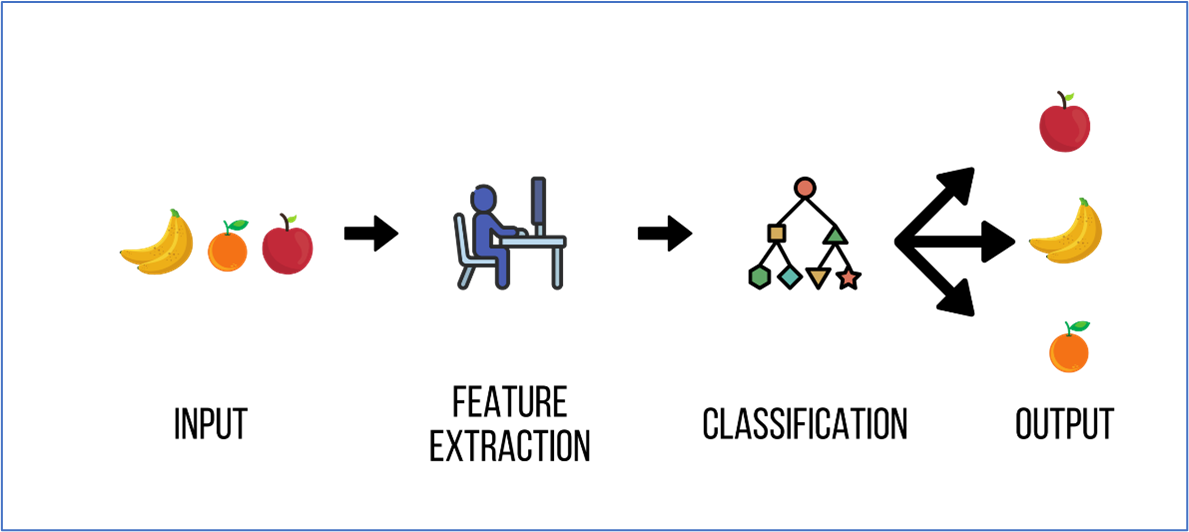

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">What Does K Fold Cross Validation Looks like</h1>  
     
</div>

In [42]:
train = df_train

In [43]:
df_test1 =df_test

In [44]:
df_test1

Marital status  Application mode  Application order    Course  \
0           -0.255461         -0.907979          -0.525686  0.278532   
1           -0.255461         -0.907979          -0.525686  0.134488   
2           -0.255461         -0.907979          -0.525686  0.134488   
3           -0.255461          1.661098          -0.525686  0.084458   
4           -0.255461          1.362368          -0.525686  0.371996   
...               ...               ...                ...       ...   
51007       -0.255461         -0.907979           0.284344 -4.850422   
51008        1.954857          1.362368          -0.525686  0.069064   
51009       -0.255461         -0.907979          -0.525686 -4.850422   
51010       -0.255461         -0.907979           1.094374  0.428624   
51011       -0.255461         -0.907979          -0.525686 -4.850422   

       Daytime/evening attendance  Previous qualification  \
0                               1               -0.310638   
1                               1               -0.310638   
2                               1               -0.310638   
3                               1                4.046796   
4                               1               -0.310638   
...                           ...                     ...   
51007                           1               -0.310638   
51008                           1                1.753410   
51009                           1               -0.310638   
51010                           1               -0.310638   
51011                           1               -0.310638   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                            0.773698     -0.07126               -1.091623   
1                           -0.394702     -0.07126               -1.221404   
2                           -1.293471     -0.07126               -1.221404   
3                           -0.214948     -0.07126               -1.221404   
4                           -2.012487     -0.07126               -1.221404   
...                               ...          ...                     ...   
51007                       -0.394702     -0.07126                1.179541   
51008                        0.063670     -0.07126               -0.053377   
51009                       -0.484579     -0.07126               -1.221404   
51010                       -0.035194     -0.07126               -0.053377   
51011                       -0.304825     -0.07126                1.114651   

       Father's qualification  ...  Grade_interaction_2nd_sem  \
0                   -1.496139  ...                   0.000000   
1                   -0.291854  ...                1572.750000   
2                   -0.291854  ...                1256.200000   
3                   -0.291854  ...                1430.000000   
4                    0.912431  ...                1130.666667   
...                       ...  ...                        ...   
51007                0.912431  ...                   0.000000   
51008                0.912431  ...                   0.000000   
51009               -1.496139  ...                   0.000000   
51010               -0.291854  ...                1641.900000   
51011                0.979336  ...                   0.000000   

       Age_interaction  Economic_interaction  Qualification_interaction  \
0               2538.0               -3.2943                      152.1   
1               2432.0               13.4532                      116.5   
2               2124.0             -176.2040                      114.2   
3               2990.0               43.7346                     5070.0   
4               2860.0                6.3232                      106.0   
...                ...                   ...                        ...   
51007           2432.0             -176.2040                      124.7   
51008           4392.3               23.4624                     2660.0   
51009           

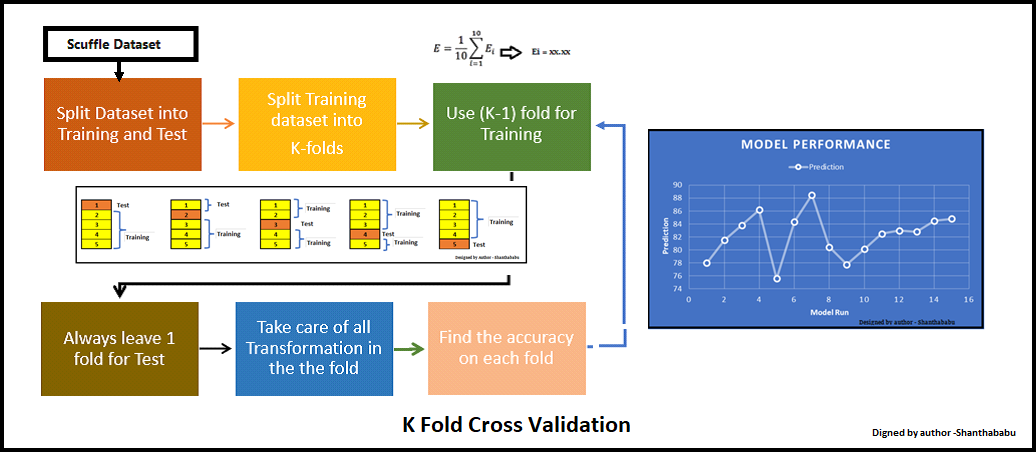

In [46]:
train.shape

(80942, 69)

# Please Look into refrence for Paramteres, Which were Barrowed from works as mentioned Upvote them  :)

In [48]:

lgb_params1 =  {'boosting_type': 'gbdt', 'verbose': -1, 'n_estimators': 680,
                'learning_rate': 0.03, 'colsample_bytree': 0.5, 'reg_lambda': 1.8, 
                'min_child_samples': 95, 'num_leaves': 56}

lgb_params2 = {"boosting_type": "gbdt","objective": "multiclass","metric": "multi_logloss", 'num_class':3,      
     'n_estimators': 1024,
     'reg_alpha': 2.6756579164398144, 'reg_lambda': 1.6187614490530422, 
     'colsample_bytree': 0.7, 'subsample': 0.7,
     'learning_rate': 0.030479973315991688, 'num_leaves': 50, 'min_child_samples': 62,
     'max_bin':245,
}

lgb_params3 = {
    'n_estimators': 8000,
    'num_class': 3,
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'verbosity': -1,
    'random_state': 99,
    'reg_alpha': 1.7878527151970849,
    'reg_lambda': 1.391543710164331,
    'colsample_bytree': 0.5,
    'subsample': 0.5,
    'learning_rate': 0.04,
    'max_depth': 20,
    'num_leaves': 70,
    'min_child_samples': 40,
    'min_data_per_groups': 16
}


n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


lgbm_predictions1 = np.zeros(len(train))
lgbm_predictions2 = np.zeros(len(train))
lgbm_predictions3 = np.zeros(len(train))

lgbm_test_predictions1 = np.zeros((len(df_test1), len(np.unique(y))))
lgbm_test_predictions2 = np.zeros((len(df_test1), len(np.unique(y))))
lgbm_test_predictions3 = np.zeros((len(df_test1), len(np.unique(y))))

num_classes = len(np.unique(y))

from lightgbm import LGBMClassifier
import numpy as np

def train_predict(params, train, y, df_test1, n_splits, kf):
    fold_predictions = np.zeros(len(train))
    fold_test_predictions = np.zeros((len(df_test1), num_classes))
    feature_importances = np.zeros(train.shape[1])

    for fold, (train_idx, val_idx) in enumerate(kf.split(train, y)):
        X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Initialize model
        lgbm_model = LGBMClassifier(**params)

        # Train without using early_stopping_rounds for now
        lgbm_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

        # Predictions
        lgbm_fold_preds = lgbm_model.predict(X_val)
        lgbm_fold_test_preds = lgbm_model.predict_proba(df_test1)

        # Save fold predictions
        fold_predictions[val_idx] = lgbm_fold_preds
        fold_test_predictions += lgbm_fold_test_preds / n_splits

        # Accumulate feature importances
        feature_importances += lgbm_model.feature_importances_

    return fold_predictions, fold_test_predictions, feature_importances

# Run the function to verify
preds1, test_preds1, feat_imports1 = train_predict(lgb_params1, train, y, df_test1, n_splits, kf)





In [49]:
preds1, test_preds1, feat_imports1 = train_predict(lgb_params1, train, y, df_test1, n_splits, kf)

ensemble_train_preds = np.array([preds1]).T
ensemble_train_preds = mode(ensemble_train_preds, axis=1).mode.flatten()

ensemble_test_preds = (test_preds1) 

ensemble_test_preds_labels = np.argmax(ensemble_test_preds, axis=1)

overall_metric_lgbm = accuracy_score(y, ensemble_train_preds)
print("Overall Accuracy (Ensemble LGBM):", overall_metric_lgbm)

Overall Accuracy (Ensemble LGBM): 0.8308418373650268


In [50]:
preds2, test_preds2, feat_imports2 = train_predict(lgb_params2, train, y, df_test1, n_splits, kf)

ensemble_train_preds2 = np.array([preds2]).T
ensemble_train_preds2 = mode(ensemble_train_preds2, axis=1).mode.flatten()

ensemble_test_preds2 = (test_preds2) 

ensemble_test_preds_labels2 = np.argmax(ensemble_test_preds2, axis=1)

overall_metric_lgbm = accuracy_score(y, ensemble_train_preds2)
print("Overall Accuracy (Ensemble LGBM):", overall_metric_lgbm)

Overall Accuracy (Ensemble LGBM): 0.8301252748881915


In [51]:
preds3, test_preds3, feat_imports3 = train_predict(lgb_params3, train, y, df_test1, n_splits, kf)

ensemble_train_preds3 = np.array([preds3]).T
ensemble_train_preds3 = mode(ensemble_train_preds3, axis=1).mode.flatten()

ensemble_test_preds3 = (test_preds3) 

ensemble_test_preds_labels3 = np.argmax(ensemble_test_preds3, axis=1)

overall_metric_lgbm = accuracy_score(y, ensemble_train_preds3)
print("Overall Accuracy (Ensemble LGBM):", overall_metric_lgbm)

Overall Accuracy (Ensemble LGBM): 0.8246892836846137


<div class="alert alert-success">  
    <h1 align="center" style="font-weight: bold;color:darkgoldenrod;">Final Submission</h1>  
     
</div>

In [53]:
ypred = (ensemble_test_preds_labels3+ensemble_test_preds_labels2+ensemble_test_preds_labels)/3

In [54]:
classi = np.round(ypred).astype(int)
categorical_predictions = label_encoder.inverse_transform(classi)

In [55]:
categorical_predictions

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [56]:
df_sub['Target'] =categorical_predictions

In [57]:
df_sub.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [58]:
df_sub.to_csv('submission.csv', index=False)

In [59]:
df_sub['Target'].value_counts()

Target
Graduate    26329
Dropout     15278
Enrolled     9405
Name: count, dtype: int64

<Axes: >

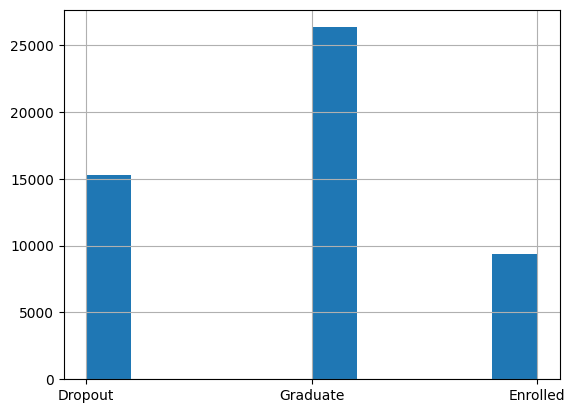

In [60]:
df_sub['Target'].hist()

<table border="1" cellpadding="5">
    <tr>
        <th>Implications</th>
        <th>Actionable Insights</th>
    </tr>
    <tr>
        <td>
            <strong>Targeted Support:</strong><br>
            Focusing on improving academic performance and providing support for younger students could enhance graduation rates.
        </td>
        <td>
            <ul>
                <li>Develop interventions to improve academic performance, particularly targeting younger students.</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>
            <strong>Comprehensive Support:</strong><br>
            Considering macroeconomic factors alongside academic performance is crucial for understanding students' experiences and challenges.
        </td>
        <td>
            <ul>
                <li>Consider the broader economic context when designing support programs.</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>
            <strong>Inclusive Strategies:</strong><br>
            Tailoring interventions to address the specific needs of scholarship holders and understanding gender dynamics can promote inclusivity and support diverse student populations.
        </td>
        <td>
            <ul>
                <li>Provide tailored support for scholarship holders and address gender-specific challenges to promote inclusivity and equity in education.</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>
            <strong>Family Engagement:</strong><br>
            Involving families in students' academic journeys can enhance support networks and contribute to student success.
        </td>
        <td>
            <ul>
                <li>Engage families in supporting students' academic endeavors, recognizing their influence on student success.</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>
            <strong>Demographic Considerations:</strong><br>
            Understanding the impact of demographic factors such as marital status and age can inform the design of inclusive support programs.
        </td>
        <td>
            <ul>
                <li>Design support programs that cater to the diverse needs of students based on demographic factors such as marital status and age.</li>
            </ul>
        </td>
    </tr>
</table>
